Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.5409103507495087
Cost after iteration 200: 0.39899653368555876
Cost after iteration 300: 0.3250856235078333
Cost after iteration 400: 0.2882359527928751
Cost after iteration 500: 0.2592551352439724
Cost after iteration 600: 0.23569354270926735
Cost after iteration 700: 0.2160828856630723
Cost after iteration 800: 0.19946877528612245
Cost after iteration 900: 0.18519481505785623
Cost after iteration 1000: 0.1727901734878397
Cost after iteration 1100: 0.16190601075961422
Cost after iteration 1200: 0.15227714891035293
Cost after iteration 1300: 0.14369775167873855
Cost after iteration 1400: 0.13600524275624998
Cost after iteration 1500: 0.12906930517550388
Cost after iteration 1600: 0.1227841415637754
Cost after iteration 1700: 0.11706289816890271
Cost after iteration 1800: 0.11183356588179495
Cost after iteration 1900: 0.10703591411504033
Train accuracy: 100.00%
Test accuracy: 52.17%
Misclassified indices: [ 0  1  4  

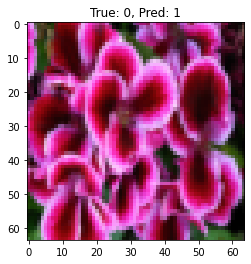

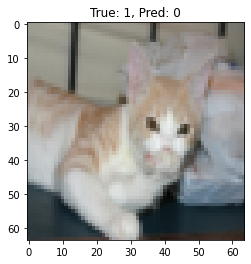

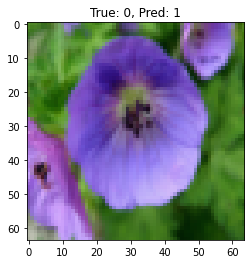

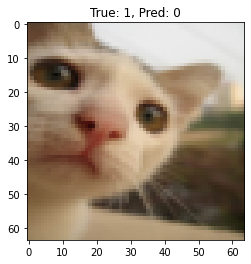

In [1]:
#  Modified Dataset for Binary Classification

import numpy as np
import matplotlib.pyplot as plt
import h5py

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Propagation (forward and backward)
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # Backward propagation
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    grads = {"dw": dw, "db": db}
    return grads, cost

# Optimization
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        # Update parameters
        dw = grads["dw"]
        db = grads["db"]
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Store the cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

# Prediction
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    predictions = (A > 0.5).astype(int)
    return predictions

# Load dataset
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', 'r')
    test_dataset = h5py.File('test_catvnoncat.h5', 'r')

    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y = np.array(train_dataset["train_set_y"][:])  # Train set labels
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

# Flatten and normalize the dataset
def preprocess_data(train_set_x_orig, test_set_x_orig):
    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

    train_set_x = train_set_x_flatten / 255.
    test_set_x = test_set_x_flatten / 255.
    return train_set_x, test_set_x

# Load and preprocess dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_x, test_set_x = preprocess_data(train_set_x_orig, test_set_x_orig)

# Modify the dataset as per the task requirements
last_digit = 43
num_train = 160 + (last_digit % 10)  # New training set
train_set_x_new = train_set_x[:, :num_train]
train_set_y_new = train_set_y[:, :num_train]
test_set_x_new = train_set_x[:, num_train:]
test_set_y_new = train_set_y[:, num_train:]

# Initialize parameters
w, b = initialize_parameters(train_set_x_new.shape[0])

# Train the model
num_iterations = 2000
learning_rate = 0.005
params, grads, costs = optimize(w, b, train_set_x_new, train_set_y_new, num_iterations, learning_rate)

# Get trained parameters
w = params["w"]
b = params["b"]

# Predictions
train_predictions = predict(w, b, train_set_x_new)
test_predictions = predict(w, b, test_set_x_new)

# Accuracy
train_accuracy = 100 - np.mean(np.abs(train_predictions - train_set_y_new)) * 100
test_accuracy = 100 - np.mean(np.abs(test_predictions - test_set_y_new)) * 100
print(f"Train accuracy: {train_accuracy:.2f}%")
print(f"Test accuracy: {test_accuracy:.2f}%")

# Identify misclassified indices
misclassified_indices = np.where(test_predictions != test_set_y_new)[1]
print("Misclassified indices:", misclassified_indices)

# Display 4 misclassified images
for i, index in enumerate(misclassified_indices[:4]):
    plt.figure()
    plt.imshow(test_set_x_new[:, index].reshape((64, 64, 3)))
    plt.title(f"True: {test_set_y_new[0, index]}, Pred: {test_predictions[0, index]}")
    plt.show()
